# **AULA 1 - Pandas**

In [83]:
# Importar GDrive y montar la unidad

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
# Importar Pandas y leer el modelo CSV

import pandas as pd

inmuebles = pd.read_csv('/content/drive/MyDrive/Inmersion Datos Python Alura/datasets/inmuebles_bogota.csv')

inmuebles.head()  # Ver un sample de los 1ros 5 registros

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


Este archivo CSV contiene las siguiente columnas:
Descripcion, Habitaciones, Baños, Área, Barrio, UPZ, Valor

En Bogotá las localidades se subdividen en UPZs (Unidades de planeacion zonal), a su vez las UPZs se subdividen en Barrios. Existen hasta 117 UPZs


In [85]:
# Reemplazar titulos conflictivos en el head

colsDictionary = { 'Baños':'Banos', 'Área':'Area' }

inmuebles = inmuebles.rename(columns = colsDictionary)

inmuebles.sample(10)  # Ver un sample de 10 registros aleatorios

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
4881,Casa,Casa en venta en Barrios Unidos,8,3,290,Barrios Unidos,Los Andes,$ 2.500.000.000
4303,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,83,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 280.000.000
6750,Apartamento,Apartamento en venta en Bosa,3,1,49,Bosa,Bosa Central,$ 112.000.000
3370,Apartamento,Apartamento en venta en Kennedy,3,1,45,Kennedy,Kennedy Central,$ 176.000.000
3031,Casa,Casa en venta en Bosa,5,4,220,Bosa,Bosa Central,$ 350.000.000
2764,Apartamento,Apartamento en venta en Bosa,3,1,47,Bosa,Bosa Central,$ 128.000.000
4655,Apartamento,Apartamento en venta en Barrios Unidos,3,2,81,Barrios Unidos,Los Andes,$ 332.500.000
9252,Apartamento,Apartamento en venta en El Batán,2,2,75,El Batán,La Alhambra,$ 450.000.000
6276,Apartamento,Apartamento en venta en Engativa,3,2,112,Engativa,Engativá,$ 345.000.000
241,Apartamento,Apartamento en venta en San Patricio,1,2,60,San Patricio,USAQUÉN: Country Club + Santa Bárbara,$ 445.000.000


In [86]:
# Ver un resumen/analisis del contenido del CSV

inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [87]:
# Tomar rangos de muestras:

inmuebles[300:305]  # Rango de 300 al 304

inmuebles['Valor'][300:305]   # Obtener los valores de los inmuebles de 300 a 304

300    $ 116.100.000
301    $ 980.000.000
302    $ 237.000.000
303    $ 320.000.000
304    $ 530.000.000
Name: Valor, dtype: object

In [88]:
# Algunas operaciones simples con Pandas:

inmuebles.Area.mean()   # Obtener el promedio de las Areas de todos los inmuebles

inmuebles_chico = (inmuebles.Barrio == 'Chico Reservado')   # Crear una Panda Series de aquellos inmuebles en el Barrio "Chico Reservado"

sum(inmuebles_chico)    # Contar estos inmuebles

inmuebles[inmuebles_chico]    # Crear un dataframe de estos datos

inmuebles.UPZ.value_counts()   # Contar la cantidad de inmuebles que hay por UPZs

len(inmuebles.UPZ.value_counts()) # Contar la cantidad de UPZs que existen



63

<Axes: >

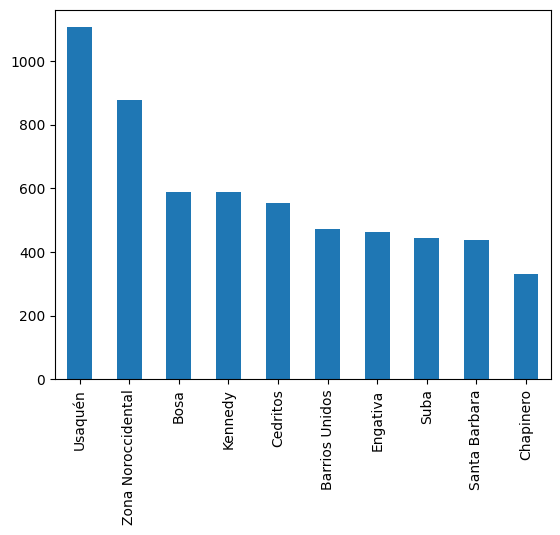

In [89]:
# Graficar:

inmuebles_barrio = inmuebles.Barrio.value_counts()

inmuebles_barrio.plot.bar()   # Grafico de barras completo

inmuebles_barrio.head(10).plot.bar()   # Grafico de barras de solo los 10 con mas cantidad

Desafios Aula1:

1) Promedio de área de todos los inmuebles en los barrios en el dataset. Grafico del top 10.

2) Consultar otros datos estadísticos, conteo, mediana, valores mínimo y máximo.

# **AULA 2 - Tratamiento de datos y Graficos**

El campo de Valor esta como String ya que contiene el numero cargado con puntos separadores y con signo $

In [92]:
# Trabajamos con esta columna de Valor

inmuebles.Valor[0].split()  # El metodo split toma por default el espacio vacio para separar en substrings, entonces se separa el '$' del 'numero'

valorDataframe = inmuebles.Valor.str.split(expand = True)  # Con str puedo trabajar la columna completa, con expand puedo convertir este Panda.Series en un dataframe

In [93]:
# Agregamos dos nuevas columnas con los datos que separamos de Valor

inmuebles['Moneda'] = valorDataframe[0]
inmuebles['Precio'] = valorDataframe[1].str.replace('.', '', regex = True)  # tambien se remueven los puntos molestos

inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio
1224,Apartamento,Apartamento en venta en Kennedy,3,1,96,Kennedy,Kennedy Central,$ 160.000.000,$,160000000
3452,Apartamento,Apartamento en venta en Bosa,2,1,45,Bosa,Bosa Central,$ 116.000.000,$,116000000
4643,Apartamento,Apartamento en venta en Los Mártires,4,2,200,Los Mártires,La Sabana,$ 600.000.000,$,600000000


In [94]:
# Convertimos a valor numerico esta columna de precio

inmuebles['Precio_En_Millones'] = inmuebles.Precio.astype('float')/1000000

inmuebles.describe()  # Nos permite ver el conteo de filas, el valor medio, el desvio estandar (mayor concentracion), el min, el max, etc

,Habitaciones,Banos,Area,Precio_En_Millones
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


In [95]:
# Cambiar opciones de visualizacion y formato de datos de Pandas:

pd.set_option('display.precision', 2)   # 2decimales
pd.set_option('display.float_format', lambda x: '%.2f' % x)   # tipo float

In [96]:
# Localizar datos de interes

inmuebles.loc[inmuebles.Area == 2]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_En_Millones
8401,Apartamento,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,$ 180.000.000,$,180000000,180.00


Histograma:
Es un grafico donde se puede observar la distribucion de frecuencias de una variable, o sea que tan seguido se repite.
Bins = cantidad fraccionamiento horizontal de las barras, o cuantas variables se agrupan en una barra.
Cuanto mas grande sean los bins se logra mayor resolucion, pero se puede perder el objetivo de representar un comportamiento estadistico.

<Axes: ylabel='Frequency'>

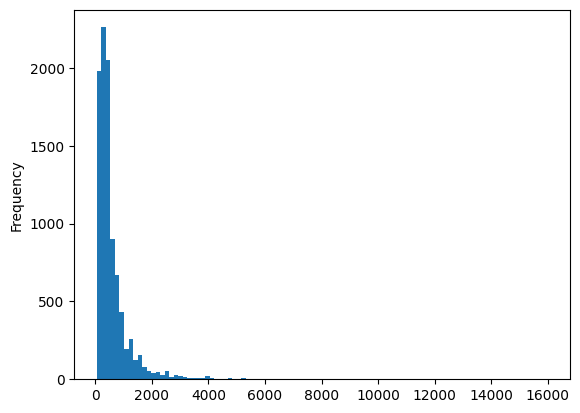

In [97]:
# Graficar un histograma (Pandas usa matplotlib)

inmuebles['Precio_En_Millones'].plot.hist(bins = 100)

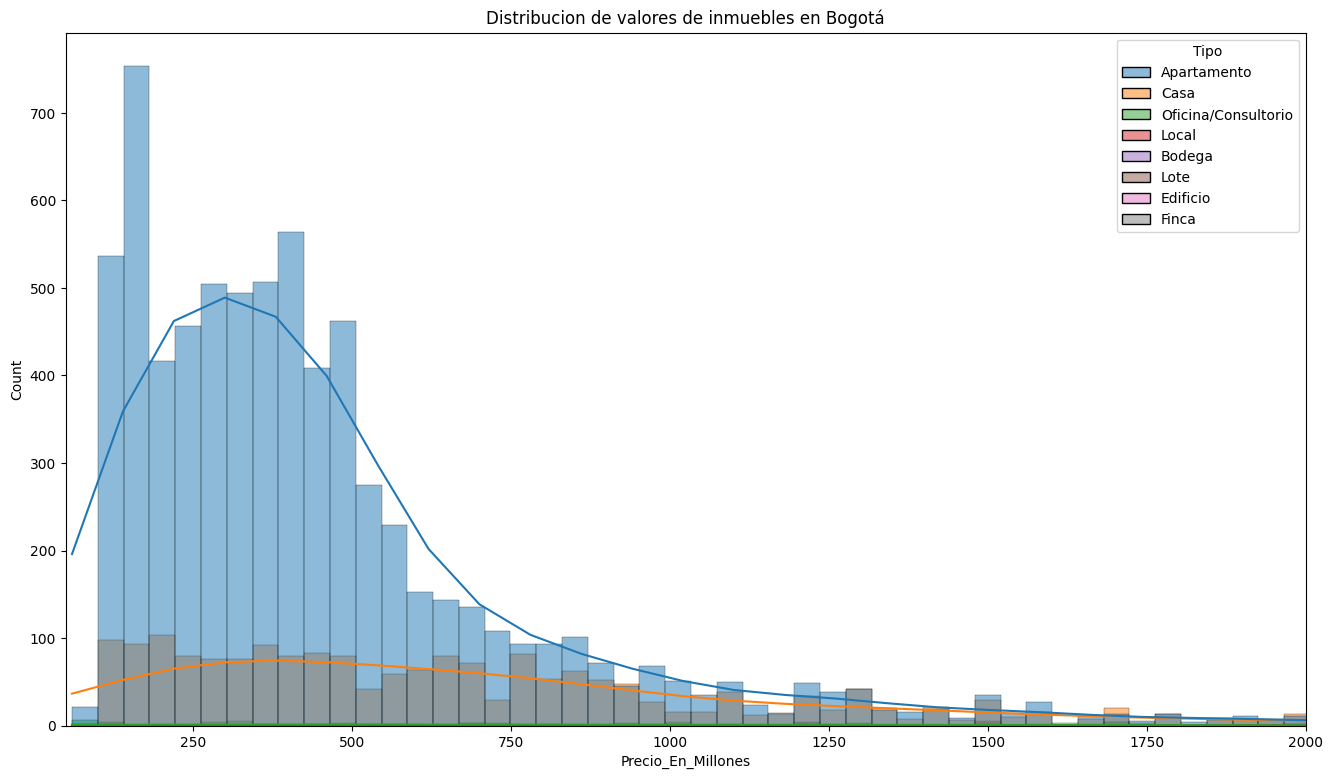

In [98]:
# Graficar con Seaborn:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (16, 9))   # Defino una superficie de x=16 y=9

grafico = sns.histplot(data = inmuebles, x = 'Precio_En_Millones', kde = True, hue = 'Tipo')  # Defino grafico de Seaborn, kde = Curva aproximacion, hue = colores para agregar variable al grafico

grafico.set_title('Distribucion de valores de inmuebles en Bogotá')   # Titulo
plt.xlim(50, 2000)  # Cambiar rango horizontal del grafico
plt.savefig('/content/drive/MyDrive/Inmersion Datos Python Alura/figures/valor_inmuebles.png', format = 'png')
plt.show()




Desafios Aula2:

1) Graficar individualmente 3 Tipos de inmuebles para que se observen mejor, Refinar esteticamente los graficos para que se vean mas profesionales
2) Crear nueva columna de Precio del m^2 por Barrio, y graficar

# **AULA 3 - Analisis Exploratorio**

In [99]:
# Desafios Aula2)
# -Primero creamos una nueva columna con el Precio del m^2
# -Luego los agrupamos por Barrio en un nuevo dataset
# -Luego creamos otra nueva columna donde vamos a calcular manualmente el promedio para compararlo con el promedio que calcula pandas

inmuebles['Valor_m2_En_Millones'] = inmuebles['Precio_En_Millones'] / inmuebles['Area']
datos_barrio = inmuebles.groupby('Barrio').mean()
datos_barrio['Valor_m2_Barrio'] = datos_barrio['Precio_En_Millones'] / datos_barrio['Area']

# datos_barrio.head()


# -Reemplazamos la columna de Valor_m2_Barrio por los promedios antes calculados

diccionario_m2_barrio = dict(datos_barrio['Valor_m2_Barrio'])
inmuebles['Valor_m2_Barrio'] = inmuebles['Barrio']    # Primero en la columna dejamos los titulos de los barrios
inmuebles['Valor_m2_Barrio'] = inmuebles['Valor_m2_Barrio'].map(diccionario_m2_barrio)    # Luego mediante un diccionario guardamos los datos del promedio por barrio

indice_top_barrios_inmuebles = inmuebles['Barrio'].value_counts()[:10].index

datos_barrio.reset_index(inplace = True)

query_top_barrios = datos_barrio.query('Barrio in @indice_top_barrios_inmuebles')  # Para visualizar solo aquellos resultados que pertenecen al top

<ipython-input-99-73aac4b502eb>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datos_barrio = inmuebles.groupby('Barrio').mean()


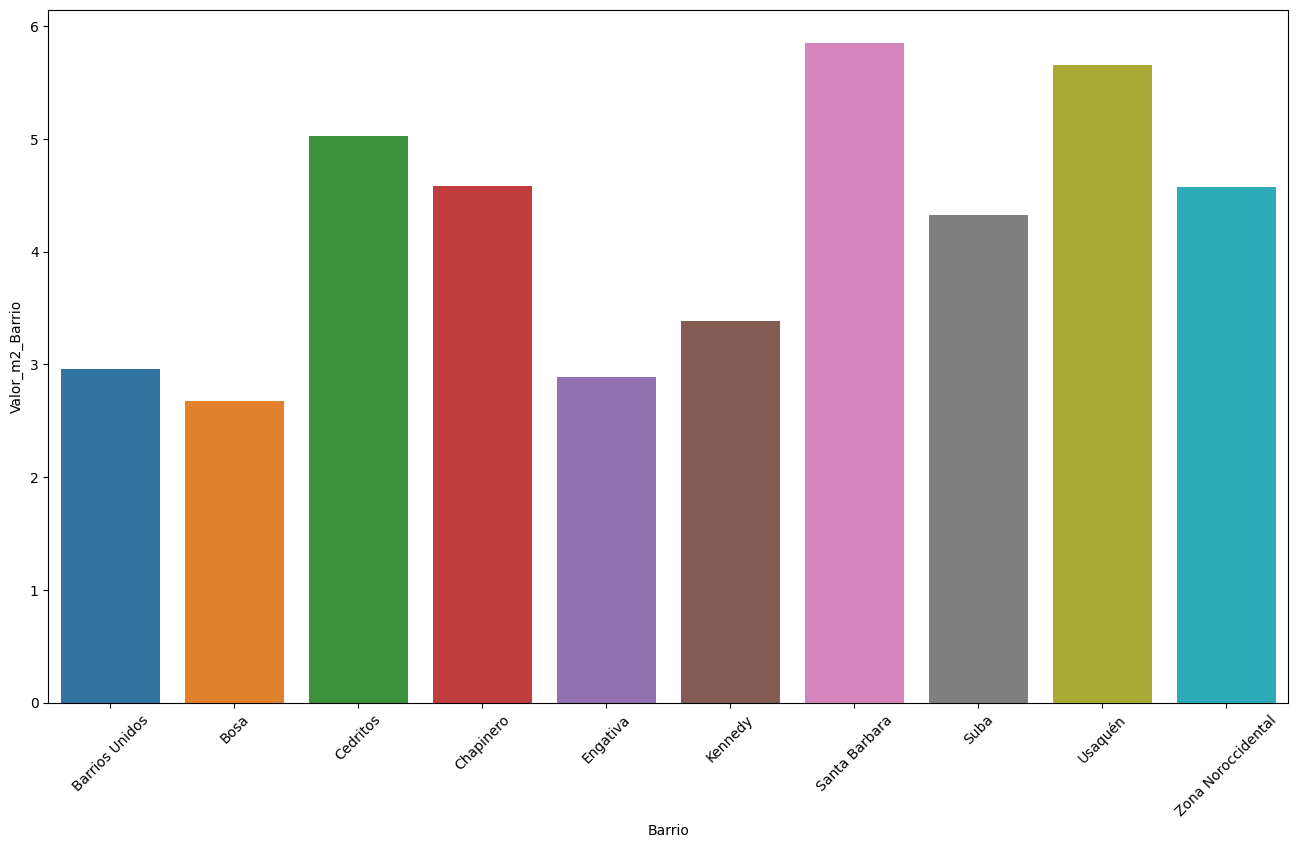

In [100]:
# Visualizacion con barplot de seaborn

plt.figure(figsize = (16, 9))
ax = sns.barplot(x = 'Barrio', y = 'Valor_m2_Barrio', data = query_top_barrios)
ax.tick_params(axis='x', rotation=45)   # Rotar nombres en eje x 45 grados

plt.savefig('/content/drive/MyDrive/Inmersion Datos Python Alura/figures/top_inmuebles_valor_m2_barplot.png', format = 'png')
plt.show()

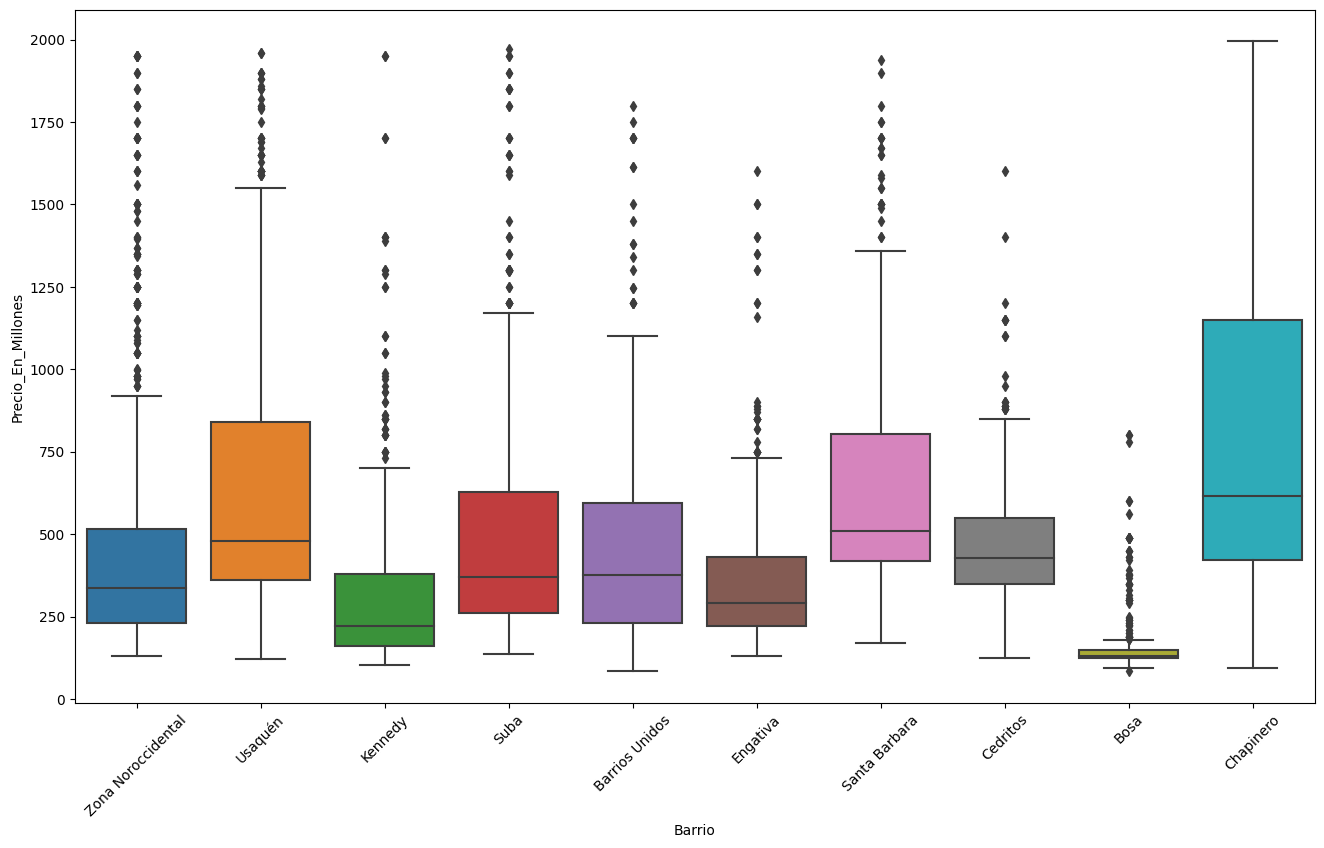

In [101]:
# Visualizacion con boxplot de seaborn

plt.figure(figsize = (16, 9))

query_inmuebles = inmuebles.query('Barrio in @indice_top_barrios_inmuebles & Precio_En_Millones < 2000')

ax = sns.boxplot(x = 'Barrio', y = 'Precio_En_Millones', data = query_inmuebles)
ax.tick_params(axis='x', rotation=45)   # Rotar nombres en eje x 45 grados

plt.savefig('/content/drive/MyDrive/Inmersion Datos Python Alura/figures/top_inmuebles_valor_m2_boxplot.png', format = 'png')
plt.show()

Encuesta Multipropósito Bogotá - Cundinamarca - EM - 2021     
      
https://microdatos.dane.gov.co/index.php/catalog/743/get-microdata     
     
Esta encuesta es como un Censo realizado por el DANE (Departamento Administrativo Nacional de Estadisticas de Colombia)


In [102]:
# Leemos el primer CSV de este Archivo de Datos.
# No esta en UTF-8 asi que se pasa por parametro el tipo de encoding
# El separador es un ';' y no ',', asi que se cambia eso tambien

identificacion_raw = pd.read_csv('/content/drive/MyDrive/Inmersion Datos Python Alura/datasets/Identificación (Capítulo A).csv', sep = ';', encoding = 'latin-1')

identificacion_raw.head()

,DIRECTORIO,DPTO,MPIO,CLASE,COD_LOCALIDAD,NOMBRE_LOCALIDAD,COD_UPZ_GRUPO,NOMBRE_UPZ_GRUPO,ESTRATO2021,NOMBRE_ESTRATO,FEX_C
0,3004346.00,11,11001,1,3.00,Santa Fe,814.00,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"13,2266692027239"
1,3004347.00,11,11001,1,14.00,Los Mártires,37.00,Santa Isabel,11001162,Santa Isabel,"17,8555889419101"
2,3004348.00,11,11001,1,3.00,Santa Fe,814.00,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"10,0286103658331"
3,3004349.00,11,11001,1,1.00,Usaquén,803.00,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"28,6502122142802"
4,3004350.00,11,11001,1,1.00,Usaquén,803.00,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"24,4684068319009"


In [103]:
# Este dataset tiene en cuenta a otros munipios ademas de Bogotá, asi que se seleccionan los del muinicipio de Bogota DC

identificacion_bogota = identificacion_raw.loc[identificacion_raw.MPIO == 11001]

identificacion_bogota.shape  # Para ver la cantidad de filas y columnas obtenidas

(86504, 11)

In [104]:
# Levantamos los otros datasets mediante la misma estrategia

composicion_hogar_raw = pd.read_csv('/content/drive/MyDrive/Inmersion Datos Python Alura/datasets/Composición del hogar y demografía (Capítulo E).csv', sep = ';', encoding = 'latin-1')
condiciones_hogar_raw = pd.read_csv('/content/drive/MyDrive/Inmersion Datos Python Alura/datasets/Condiciones habitacionales del hogar (Capítulo C).csv', sep = ';', encoding = 'latin-1')
vivienda_entorno_raw = pd.read_csv('/content/drive/MyDrive/Inmersion Datos Python Alura/datasets/Datos de la vivenda y su entorno (Capítulo B).csv', sep = ';', encoding = 'latin-1')
educacion_raw = pd.read_csv('/content/drive/MyDrive/Inmersion Datos Python Alura/datasets/Educación (Capitulo H).csv', sep = ';', encoding = 'latin-1')
fuerza_trabajo_raw = pd.read_csv('/content/drive/MyDrive/Inmersion Datos Python Alura/datasets/Fuerza de trabajo (Capítulo K).csv', sep = ';', encoding = 'latin-1')
percepcion_condiciones = pd.read_csv('/content/drive/MyDrive/Inmersion Datos Python Alura/datasets/Percepción sobre las condiciones de vida y el desempeño institucional (Capítulo L).csv', sep = ';', encoding = 'latin-1')

<ipython-input-104-41f1378ddcd6>:3: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  composicion_hogar_raw = pd.read_csv('/content/drive/MyDrive/Inmersion Datos Python Alura/datasets/Composición del hogar y demografía (Capítulo E).csv', sep = ';', encoding = 'latin-1')
<ipython-input-104-41f1378ddcd6>:4: DtypeWarning: Columns (4,25,30,47) have mixed types. Specify dtype option on import or set low_memory=False.
  condiciones_hogar_raw = pd.read_csv('/content/drive/MyDrive/Inmersion Datos Python Alura/datasets/Condiciones habitacionales del hogar (Capítulo C).csv', sep = ';', encoding = 'latin-1')
<ipython-input-104-41f1378ddcd6>:6: DtypeWarning: Columns (26,81) have mixed types. Specify dtype option on import or set low_memory=False.
  educacion_raw = pd.read_csv('/content/drive/MyDrive/Inmersion Datos Python Alura/datasets/Educación (Capitulo H).csv', sep = ';', encoding = 'latin-1')
<ipython-input-104-41f1378ddcd6>:7: DtypeWa

In [105]:
# Merge de todos los datasets mediante el identificador DIRECTORIO (RAM OVERFLOW!)

#datos_dane = pd.merge(identificacion_raw, composicion_hogar_raw, on = "DIRECTORIO", how = "left")   # Equivalente a hacer un Left-Join
#datos_dane = pd.merge(datos_dane, condiciones_hogar_raw, on = "DIRECTORIO", how = "left")
#datos_dane = pd.merge(datos_dane, vivienda_entorno_raw, on = "DIRECTORIO", how = "left")
#datos_dane = pd.merge(datos_dane, condiciones_hogar_raw, on = "DIRECTORIO", how = "left")
#datos_dane = pd.merge(datos_dane, educacion_raw, on = "DIRECTORIO", how = "left")
#datos_dane = pd.merge(datos_dane, fuerza_trabajo_raw, on = "DIRECTORIO", how = "left")
#datos_dane = pd.merge(datos_dane, percepcion_condiciones, on = "DIRECTORIO", how = "left")

Desafios Aula3:     
     
1) Mirar y estudiar que compone esta base de Dane, las filas y columnas que representan     
2) Organizar la notebook para que este mas prolija y que se pueda seguir el paso a paso de lo que se fue haciendo     

# **AULA 4 - Cruzando Base de Datos e intro a Machine Leaning**

In [106]:
# Despues de todo el merge anterior se obtiene este CSV

datos_dane = pd.read_csv('/content/drive/MyDrive/Inmersion Datos Python Alura/datasets/datos_dane.csv')

datos_dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9857 entries, 0 to 9856
Data columns (total 55 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DIRECTORIO        9857 non-null   float64
 1   NOMBRE_LOCALIDAD  9857 non-null   object 
 2   NOMBRE_ESTRATO    9857 non-null   object 
 3   NVCBP4            9857 non-null   int64  
 4   NVCBP14A          9857 non-null   int64  
 5   NVCBP14D          9857 non-null   int64  
 6   NVCBP14E          9857 non-null   int64  
 7   NVCBP14G          9857 non-null   int64  
 8   NVCBP15A          9857 non-null   int64  
 9   NVCBP15C          9857 non-null   int64  
 10  NVCBP15F          9857 non-null   int64  
 11  NVCBP15G          9857 non-null   int64  
 12  NVCBP16A3         9857 non-null   int64  
 13  NVCBP16A4         9857 non-null   int64  
 14  NPCKP17           9857 non-null   float64
 15  NPCKP18           9857 non-null   float64
 16  NPCKP23           9558 non-null   float64


In [107]:
# Estos datos tienen columnas con nombres poco intuitivos pero que representan una pregunta de la encuesta segun la documentacion,
# asi que con un diccionario se cambian por nombres un poco mas amigables de trabajar

dic_dane = {
       'NVCBP4':'CONJUNTO_CERRADO',
       'NVCBP14A':'FABRICAS_CERCA', 'NVCBP14D':'TERMINALES_BUS', 'NVCBP14E':'BARES_DISCO',
       'NVCBP14G':'OSCURO_PELIGROSO', 'NVCBP15A':'RUIDO', 'NVCBP15C':'INSEGURIDAD',
       'NVCBP15F':'BASURA_INADECUADA', 'NVCBP15G':'INVASION','NVCBP16A3':'MOV_ADULTOS_MAYORES',
       'NVCBP16A4':'MOV_NINOS_BEBES',
       'NPCKP17':'OCUPACION','NPCKP18':'CONTRATO','NPCKP23':'SALARIO_MES',
       'NPCKP44A':'DONDE_TRABAJA', 'NPCKPN62A':'DECLARACION_RENTA',
       'NPCKPN62B':'VALOR_DECLARACION', 'NPCKP64A':'PERDIDA_TRABAJO_C19',
       'NPCKP64E':'PERDIDA_INGRESOS_C19',
       'NHCCP3':'TIENE_ESCRITURA', 'NHCCP6':'ANO_COMPRA', 'NHCCP7':'VALOR_COMPRA', 'NHCCP8_1':'HIPOTECA_CRED_BANCO',
       'NHCCP8_2':'OTRO_CRED_BANCO', 'NHCCP8_3':'CRED_FNA', 'NHCCP8_6':'PRESTAMOS_AMIGOS',
       'NHCCP8_7':'CESANTIAS', 'NHCCP8_8':'AHORROS', 'NHCCP8_9':'SUBSIDIOS',
       'NHCCP9':'CUANTO_PAGARIA_MENSUAL', 'NHCCP11':'PLANES_ADQUIRIR_VIVIENDA',
       'NHCCP11A':'MOTIVO_COMPRA', 'NHCCP12':'RAZON_NO_ADQ_VIV', 'NHCCP41':'TIENE_CARRO','NHCCP41A':'CUANTOS_CARROS',
       'NHCCP47A':'TIENE_PERROS', 'NHCCP47B':'TIENE_GATOS', 'NHCLP2A':'VICTIMA_ATRACO', 'NHCLP2B':'VICTIMA_HOMICIDIO',
       'NHCLP2C':'VICTIMA_PERSECUSION',
       'NHCLP2E':'VICTIMA_ACOSO', 'NHCLP4':'COMO_VIVE_ECON', 'NHCLP5':'COMO_NIVEL_VIDA',
       'NHCLP8AB':'REACCION_OPORTUNA_POLICIA', 'NHCLP8AE':'COMO_TRANSPORTE_URBANO', 'NHCLP10':'SON_INGRESOS_SUFICIENTES',
       'NHCLP11':'SE_CONSIDERA_POBRE', 'NHCLP29_1A':'MED_C19_TRABAJO',
       'NHCLP29_1C':'MED_C19_CAMBIO_VIVIENDA', 'NHCLP29_1E':'MED_C19_ENDEUDAMIENTO',
       'NHCLP29_1F':'MED_C19_VENTA_BIENES','NPCHP4':'NIVEL_EDUCATIVO'
       }

datos_dane = datos_dane.rename(columns = dic_dane)

datos_dane.columns


Index(['DIRECTORIO', 'NOMBRE_LOCALIDAD', 'NOMBRE_ESTRATO', 'CONJUNTO_CERRADO',
       'FABRICAS_CERCA', 'TERMINALES_BUS', 'BARES_DISCO', 'OSCURO_PELIGROSO',
       'RUIDO', 'INSEGURIDAD', 'BASURA_INADECUADA', 'INVASION',
       'MOV_ADULTOS_MAYORES', 'MOV_NINOS_BEBES', 'OCUPACION', 'CONTRATO',
       'SALARIO_MES', 'DONDE_TRABAJA', 'DECLARACION_RENTA',
       'VALOR_DECLARACION', 'PERDIDA_TRABAJO_C19', 'PERDIDA_INGRESOS_C19',
       'TIENE_ESCRITURA', 'ANO_COMPRA', 'VALOR_COMPRA', 'HIPOTECA_CRED_BANCO',
       'OTRO_CRED_BANCO', 'CRED_FNA', 'PRESTAMOS_AMIGOS', 'CESANTIAS',
       'AHORROS', 'SUBSIDIOS', 'CUANTO_PAGARIA_MENSUAL',
       'PLANES_ADQUIRIR_VIVIENDA', 'MOTIVO_COMPRA', 'RAZON_NO_ADQ_VIV',
       'TIENE_CARRO', 'CUANTOS_CARROS', 'TIENE_PERROS', 'TIENE_GATOS',
       'VICTIMA_ATRACO', 'VICTIMA_HOMICIDIO', 'VICTIMA_PERSECUSION',
       'VICTIMA_ACOSO', 'COMO_VIVE_ECON', 'COMO_NIVEL_VIDA',
       'REACCION_OPORTUNA_POLICIA', 'COMO_TRANSPORTE_URBANO',
       'SON_INGRESOS_SUFICIE

In [108]:
# Se refactorean las columnas con celdas booleanas, ya que estan como 1 = Si, 2 = No

datos_dane = datos_dane[['NOMBRE_ESTRATO','CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].replace(2, 0)


# Agrupamos datos de interes segun zona o UPZ (mediante NOMBRE_ESTRATO)

datos_dane_tratados = datos_dane.groupby('NOMBRE_ESTRATO')[['CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].mean()


In [109]:
# Merge del dataset de inmuebles anteriormente trabajado con este nuevo dataset

datos_ml = pd.merge(inmuebles, datos_dane_tratados, left_on = 'UPZ', right_on = 'NOMBRE_ESTRATO', how = 'left')

In [110]:
# Se lee un nuevo dataset que relaciona los codigos de UPZ con el NOMBRE_ESTRATO

cod_upz = pd.read_csv('/content/drive/MyDrive/Inmersion Datos Python Alura/datasets/cod_upz.csv')

cod_upz.head()

,NOMBRE_ESTRATO,COD_UPZ_GRUPO
0,SANTA FE: Las Nieves + Sagrado Corazón,814.00
1,Santa Isabel,37.00
2,USAQUÉN: Country Club + Santa Bárbara,803.00
3,CHAPINERO: Pardo Rubio + Chapinero,816.00
4,Ciudad Salitre Occidental,110.00


In [111]:
# Merge final para armar el data set para trabajar con el armado de un modelo

datos_ml = pd.merge(datos_ml, cod_upz, left_on = 'UPZ', right_on = 'NOMBRE_ESTRATO', how = 'inner') # Con inner solo mergea los datos que tengan correspondencia entre ambos

datos_ml

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,...,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
1,Casa,Casa en venta en Marly,3,3,147,Marly,CHAPINERO: Pardo Rubio + Chapinero,$ 300.000.000,$,300000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
2,Casa,Casa en venta en Zona Noroccidental,3,4,300,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 2.519.000.000,$,2519000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
3,Apartamento,Apartamento en venta en Zona Noroccidental,2,1,45,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 239.000.000,$,239000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
4,Casa,Casa en venta en Zona Noroccidental,3,6,380,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 1.600.000.000,$,1600000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9313,Apartamento,Apartamento en venta en Verbenal,2,2,48,Verbenal,Verbenal,$ 250.000.000,$,250000000,...,0.03,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09,Verbenal,9.00
9314,Apartamento,Apartamento en venta en Verbenal,2,1,38,Verbenal,Verbenal,$ 180.000.000,$,180000000,...,0.03,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09,Verbenal,9.00
9315,Apartamento,Apartamento en venta en Verbenal,2,1,38,Verbenal,Verbenal,$ 180.000.000,$,180000000,...,0.03,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09,Verbenal,9.00
9316,Apartamento,Apartamento en venta en Verbenal,2,1,48,Verbenal,Verbenal,$ 240.000.000,$,240000000,...,0.03,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09,Verbenal,9.00


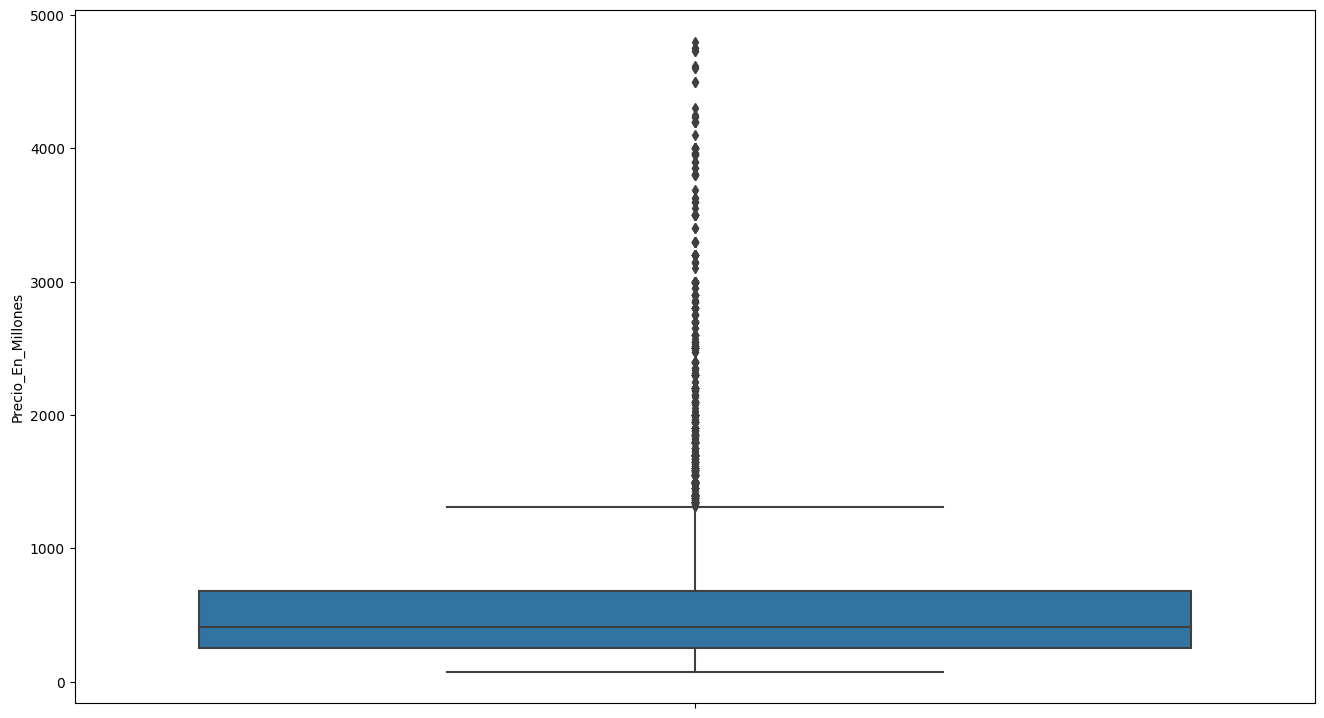

In [112]:
# Graficamos convenientemente Precio_En_Millones

plt.figure(figsize = (16, 9))

datos_ml['SALARIO_ANUAL_MILLONES'] = datos_ml['SALARIO_MES']*12/1000000   # Creamos nueva columna de Salario anual en Millones

datos_ml_query = datos_ml.query('Precio_En_Millones > 60 & Precio_En_Millones < 5000')  # datos a mostrar en el grafico

boxplot = sns.boxplot(data = datos_ml_query, y = "Precio_En_Millones")

plt.savefig('/content/drive/MyDrive/Inmersion Datos Python Alura/figures/boxplot_precio_en_millones.png', format = 'png')

plt.show()

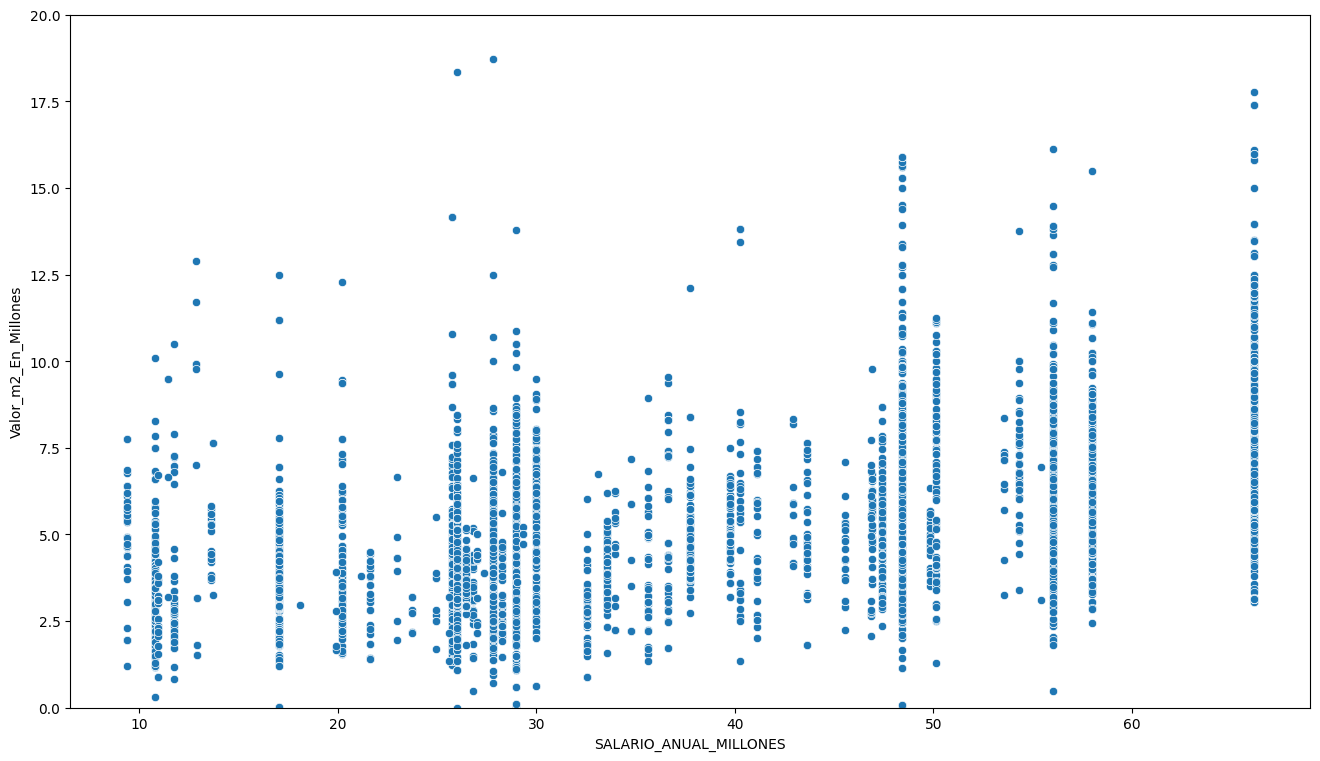

In [113]:
# Graficamos convenientemente SALARIO_ANUAL_MILLONES VS Valor_m2_En_Millones (por UPZ)

plt.figure(figsize = (16, 9))

datos_ml_query = datos_ml.query('Precio_En_Millones > 60 & Precio_En_Millones < 5000')  # datos a mostrar en el grafico

boxplot = sns.scatterplot(data = datos_ml_query, x = 'SALARIO_ANUAL_MILLONES', y = "Valor_m2_En_Millones")

plt.ylim((0, 20))

plt.savefig('/content/drive/MyDrive/Inmersion Datos Python Alura/figures/scatterplot_valor_propiedad_vs_salario.png', format = 'png')

plt.show()

El grafico anterior muestra mucha dispersion entre el Salario y el valor de las propiedades (por UPZ), asi que se podria concluir que no hay mucha relacion entre ambas variables

In [114]:
# Correlacion

# Si es cercano a 1 quiere decir que hay una correlacion directa (Si una variable crece, la otra tambien)
# Si es cercano a 0 quiere decir que no hay una correlacion entre ambas variables
# Si es cercano a -1 quiere decir que hay una correlacion indirecta (Si una variable crece, la otra decrece)

datos_ml.corr()   # Se obtiene una Correlacion del 46% entre Valor_m2_En_Millones y SALARIO_ANUAL_MILLONES

<ipython-input-114-6651f62a6403>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datos_ml.corr()   # Se obtiene una Correlacion del 46% entre Valor_m2_En_Millones y SALARIO_ANUAL_MILLONES


,Habitaciones,Banos,Area,Precio_En_Millones,Valor_m2_En_Millones,Valor_m2_Barrio,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,COD_UPZ_GRUPO,SALARIO_ANUAL_MILLONES
Habitaciones,1.00,0.48,0.04,0.24,-0.21,-0.17,-0.11,0.11,0.06,0.11,0.12,0.09,-0.14,-0.06,0.05,0.10,0.06,-0.08,-0.14
Banos,0.48,1.00,0.06,0.59,0.10,0.17,0.16,-0.20,-0.16,-0.08,-0.18,-0.20,0.21,0.11,-0.09,-0.16,-0.10,0.07,0.21
Area,0.04,0.06,1.00,0.06,-0.03,-0.03,-0.01,-0.01,-0.01,-0.01,-0.01,0.01,-0.00,-0.00,0.01,0.00,0.01,-0.00,-0.00
Precio_En_Millones,0.24,0.59,0.06,1.00,0.43,0.30,0.18,-0.23,-0.16,-0.07,-0.22,-0.20,0.29,0.09,-0.12,-0.20,-0.15,0.18,0.29
Valor_m2_En_Millones,-0.21,0.10,-0.03,0.43,1.00,0.50,0.32,-0.37,-0.27,-0.19,-0.36,-0.33,0.46,0.19,-0.20,-0.34,-0.22,0.27,0.46
Valor_m2_Barrio,-0.17,0.17,-0.03,0.30,0.50,1.00,0.64,-0.66,-0.37,-0.40,-0.66,-0.58,0.82,0.37,-0.31,-0.64,-0.25,0.41,0.82
CONJUNTO_CERRADO,-0.11,0.16,-0.01,0.18,0.32,0.64,1.00,-0.84,-0.29,-0.51,-0.70,-0.66,0.80,0.60,-0.35,-0.78,0.04,0.09,0.80
INSEGURIDAD,0.11,-0.20,-0.01,-0.23,-0.37,-0.66,-0.84,1.00,0.50,0.61,0.85,0.75,-0.81,-0.54,0.30,0.74,0.10,-0.01,-0.81
TERMINALES_BUS,0.06,-0.16,-0.01,-0.16,-0.27,-0.37,-0.29,0.50,1.00,0.38,0.66,0.57,-0.52,-0.29,0.18,0.35,0.26,-0.11,-0.52
BARES_DISCO,0.11,-0.08,-0.01,-0.07,-0.19,-0.40,-0.51,0.61,0.38,1.00,0.60,0.51,-0.38,-0.25,-0.02,0.34,-0.05,0.26,-0.38


<ipython-input-115-2a7a6faedfb2>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(datos_ml.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')


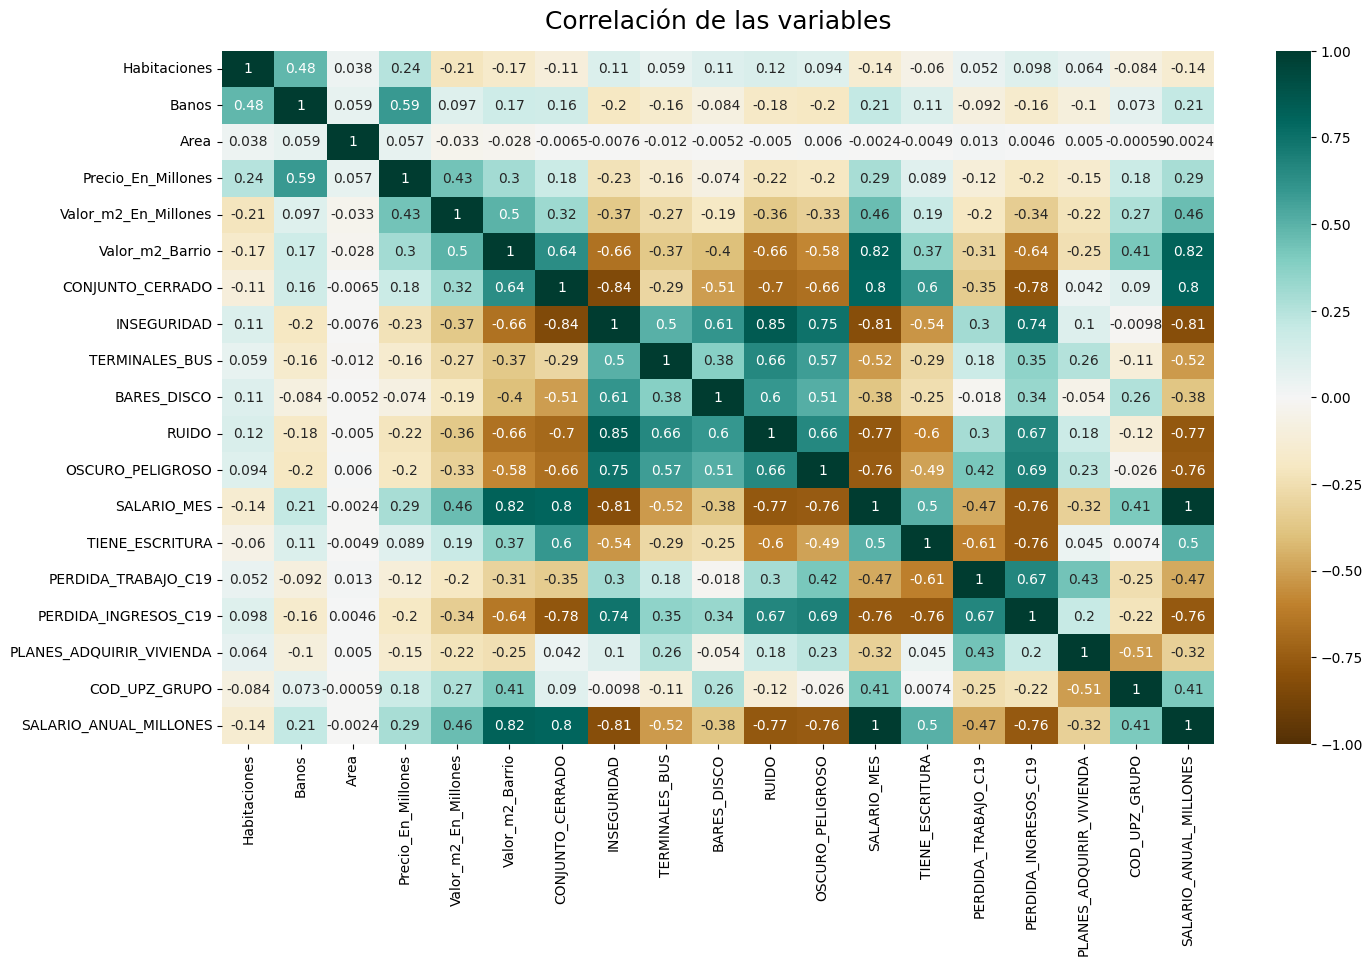

In [115]:
# Heatmap para demostrar mas visualmente la correlacion

plt.figure(figsize=(16, 9))
#https://www.tylervigen.com/spurious-correlations
#mascara = np.triu(np.ones_like(datos_ml.corr(), dtype=bool)) mask=mascara,
heatmap = sns.heatmap(datos_ml.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación de las variables', fontdict={'fontsize':18}, pad=16);

plt.savefig('/content/drive/MyDrive/Inmersion Datos Python Alura/figures/heatmap_datos_ml.png', format = 'png')

plt.show()

Entrenado de modelos:     
-Entrada de datos: dataset con que alimentar el modelo     
-Salida de datos (Respuesta del modelo): las variaables que nos interesen predecir     
-Baseline: Tomar algun atributo de interes (no necesariamente la que mas correlaciones presente), es la linea base a partir de la cual luego se realizan iteraciones para poder mejorar este modelo     

In [116]:
from IPython.utils.path import random
# Scikit
#https://scikit-learn.org/stable/

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = datos_ml[['COD_UPZ_GRUPO']]     # Es una matriz
y = datos_ml['Precio_En_Millones']  # Es un Panda Series, representa el valor a predecir

# Preparar el entrenamiento con un 75% de los datos, dejar de lado un 25% para probar despues, y el random_state es la semilla para reproducibilidad:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 99)

In [117]:
# Crear el modelo y entrenarlo

modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [118]:
# Se prueba el modelo con el 25% de los datos restantes que no se usaron para entrenarlo para ver que es capaz de predecir

y_predict = modelo.predict(X_test)


In [119]:

# Error Absoluto Medio (MAE)
# Este numero representa en promedio cuanto se alejan las predicciones (los resultados obtenidos del modelo) respecto a los valores de prueba

from sklearn.metrics import mean_absolute_error

baseline_mae = mean_absolute_error(y_test, y_predict)
baseline_mae  # Un valor alto indica predicciones imprecisas [En Millones de $]


409.2101269549263

In [120]:
# Coeficiente de determinación (R2 o R cuadrado)
# Determina la calidad del modelo para replicar los resultados

from sklearn.metrics import r2_score

baseline_r2 = r2_score(y_test, y_predict)
baseline_r2   # Un valor bajo indica que las predicciones estan lejos de la recta de regresion lineal


0.014629923194031336

In [121]:
# Vamos a tomar mas variables para entrenar el modelo

X = datos_ml[['COD_UPZ_GRUPO','Habitaciones','Banos']]  #,'CONJUNTO_CERRADO','SALARIO_ANUAL_MI','TIENE_ESCRITURA'

Y = datos_ml["Precio_En_Millones"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 99)

modelo_1 = LinearRegression()
modelo_1.fit(X_train, y_train)

y_predict_test = modelo_1.predict(X_test)
y_predict_train = modelo_1.predict(X_train)

mae_test = mean_absolute_error(y_test, y_predict_test)
r2_test = r2_score(y_test, y_predict_test)

mae_train = mean_absolute_error(y_train, y_predict_train)
r2_train = r2_score(y_train, y_predict_train)

print(mae_test,r2_test)
print(mae_train,r2_train)

280.9569073163336 0.3754493201620813
266.8258656788405 0.3606870681031179


Antes: MAE=409.2101269549263   R2=0.014629923194031336     
     
Ahora al agregar dos parametros adicionales al modelo:     
Test: MAE=280.9569073163336   R2=0.3754493201620813     
Train: MAE=266.8258656788405   R2=0.3606870681031179     

In [122]:
# Ajustamos datos_ml para centrarnos mas entre Max y Min, dejando afuera los datos dispersos:

datos_ml = datos_ml.query('Precio_En_Millones > 60 & Precio_En_Millones < 1200')

# Agregamos un par de variables adicionales en el entrenamiento del modelo:

X = datos_ml[['COD_UPZ_GRUPO','Habitaciones','Banos','CONJUNTO_CERRADO','SALARIO_ANUAL_MILLONES','TIENE_ESCRITURA']]

y = datos_ml["Precio_En_Millones"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 99)

modelo_2 = LinearRegression()
modelo_2.fit(X_train, y_train)

y_predict_test = modelo_2.predict(X_test)
y_predict_train = modelo_2.predict(X_train)

mae_test = mean_absolute_error(y_test, y_predict_test)
r2_test = r2_score(y_test, y_predict_test)

mae_train = mean_absolute_error(y_train, y_predict_train)
r2_train = r2_score(y_train, y_predict_train)

print(mae_test,r2_test)
print(mae_train,r2_train)

118.25967274431333 0.5404735562069192
123.22271988681676 0.5269614226488988


Se obtiene:     
Test:  MAE=118.25967274431333   R2=0.5404735562069192     
Train: MAE=123.22271988681676   R2=0.5269614226488988     

In [123]:
# Predecir el valor de un inmueble con ciertas caracteristicas

modelo_2.predict([[816, 3, 2, 1, 50, 1]])   # [UPZ, habitaciones, banios, conjuntoCerrado, Salario_en_M$/anio, escritura]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([434.21129691])

Se obtiene que un inmueble con:     
UPZ=816, 3 habitaciones, 2 baños, En Conjunto Cerrado, 50 millones de Salario anual, y con escritura     
Puede costar: $434.21 Millones      